In [1]:
import numpy as np
import PIL.Image
import torch

import dnnlib
import legacy
import pickle
from PIL import Image
import torch.nn as nn
import cv2

from fine_toon_project import run_projection

In [2]:
input_image_path = "./aligned_world_images/Joohomin.png"
network = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/transfer-learning-source-nets/ffhq-res256-mirror-paper256-noaug.pkl"
outdir = "./outputs"

### 1. Get latent vector of input image

In [3]:
projected_w = run_projection(network, input_image_path, outdir, False, 303, 1000)

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/transfer-learning-source-nets/ffhq-res256-mirror-paper256-noaug.pkl"...
Computing W midpoint and stddev using 10000 samples...
step    1/1000: dist 0.66 loss 24566.01
step    2/1000: dist 0.57 loss 27639.29
step    3/1000: dist 0.66 loss 27166.49
step    4/1000: dist 0.58 loss 26250.40
step    5/1000: dist 0.60 loss 24954.53
step    6/1000: dist 0.61 loss 23352.41
step    7/1000: dist 0.60 loss 21509.92
step    8/1000: dist 0.58 loss 19484.35
step    9/1000: dist 0.62 loss 17337.09
step   10/1000: dist 0.50 loss 15137.34
step   11/1000: dist 0.56 loss 12947.15
step   12/1000: dist 0.59 loss 10817.24
step   13/1000: dist 0.49 loss 8799.20
step   14/1000: dist 0.54 loss 6944.92
step   15/1000: dist 0.56 loss 5313.02
step   16/1000: dist 0.56 loss 3968.35
step   17/1000: dist 0.53 loss 2940.02
step   18/1000: dist 0.42 loss 2212.64
step   19/1000: dist 0.38 loss 1756.48
step   20/1000: dist 0.39 loss 

step  214/1000: dist 0.18 loss 3.25 
step  215/1000: dist 0.18 loss 2.64 
step  216/1000: dist 0.20 loss 2.79 
step  217/1000: dist 0.18 loss 2.52 
step  218/1000: dist 0.20 loss 1.10 
step  219/1000: dist 0.19 loss 2.46 
step  220/1000: dist 0.18 loss 2.54 
step  221/1000: dist 0.19 loss 0.41 
step  222/1000: dist 0.20 loss 1.35 
step  223/1000: dist 0.19 loss 2.27 
step  224/1000: dist 0.19 loss 0.95 
step  225/1000: dist 0.18 loss 0.81 
step  226/1000: dist 0.17 loss 1.14 
step  227/1000: dist 0.19 loss 1.00 
step  228/1000: dist 0.19 loss 0.98 
step  229/1000: dist 0.20 loss 0.63 
step  230/1000: dist 0.20 loss 0.70 
step  231/1000: dist 0.18 loss 1.02 
step  232/1000: dist 0.17 loss 0.47 
step  233/1000: dist 0.18 loss 0.36 
step  234/1000: dist 0.18 loss 0.85 
step  235/1000: dist 0.18 loss 0.61 
step  236/1000: dist 0.19 loss 0.32 
step  237/1000: dist 0.19 loss 0.50 
step  238/1000: dist 0.20 loss 0.52 
step  239/1000: dist 0.19 loss 0.46 
step  240/1000: dist 0.18 loss 0.44 
s

step  436/1000: dist 0.14 loss 0.27 
step  437/1000: dist 0.13 loss 1.09 
step  438/1000: dist 0.13 loss 1.53 
step  439/1000: dist 0.13 loss 0.74 
step  440/1000: dist 0.14 loss 0.27 
step  441/1000: dist 0.13 loss 0.72 
step  442/1000: dist 0.13 loss 1.00 
step  443/1000: dist 0.13 loss 0.65 
step  444/1000: dist 0.14 loss 0.37 
step  445/1000: dist 0.14 loss 0.56 
step  446/1000: dist 0.13 loss 0.88 
step  447/1000: dist 0.13 loss 0.96 
step  448/1000: dist 0.13 loss 1.02 
step  449/1000: dist 0.13 loss 1.64 
step  450/1000: dist 0.13 loss 2.92 
step  451/1000: dist 0.14 loss 4.61 
step  452/1000: dist 0.13 loss 6.76 
step  453/1000: dist 0.14 loss 9.10 
step  454/1000: dist 0.13 loss 9.95 
step  455/1000: dist 0.13 loss 7.62 
step  456/1000: dist 0.13 loss 3.92 
step  457/1000: dist 0.13 loss 3.19 
step  458/1000: dist 0.13 loss 7.59 
step  459/1000: dist 0.13 loss 15.13
step  460/1000: dist 0.13 loss 22.00
step  461/1000: dist 0.13 loss 23.34
step  462/1000: dist 0.12 loss 16.16
s

step  658/1000: dist 0.11 loss 9.20 
step  659/1000: dist 0.10 loss 6.21 
step  660/1000: dist 0.11 loss 2.06 
step  661/1000: dist 0.11 loss 0.74 
step  662/1000: dist 0.10 loss 3.25 
step  663/1000: dist 0.11 loss 5.35 
step  664/1000: dist 0.10 loss 4.47 
step  665/1000: dist 0.11 loss 2.96 
step  666/1000: dist 0.10 loss 3.76 
step  667/1000: dist 0.11 loss 7.13 
step  668/1000: dist 0.10 loss 10.94
step  669/1000: dist 0.10 loss 13.10
step  670/1000: dist 0.10 loss 13.48
step  671/1000: dist 0.10 loss 11.48
step  672/1000: dist 0.10 loss 6.48 
step  673/1000: dist 0.10 loss 1.70 
step  674/1000: dist 0.10 loss 1.49 
step  675/1000: dist 0.10 loss 5.02 
step  676/1000: dist 0.10 loss 7.13 
step  677/1000: dist 0.10 loss 4.78 
step  678/1000: dist 0.10 loss 0.99 
step  679/1000: dist 0.10 loss 0.70 
step  680/1000: dist 0.10 loss 3.34 
step  681/1000: dist 0.10 loss 4.24 
step  682/1000: dist 0.10 loss 2.05 
step  683/1000: dist 0.10 loss 0.24 
step  684/1000: dist 0.10 loss 1.09 
s

step  880/1000: dist 0.10 loss 0.10 
step  881/1000: dist 0.10 loss 0.10 
step  882/1000: dist 0.10 loss 0.10 
step  883/1000: dist 0.10 loss 0.10 
step  884/1000: dist 0.10 loss 0.10 
step  885/1000: dist 0.10 loss 0.10 
step  886/1000: dist 0.10 loss 0.10 
step  887/1000: dist 0.10 loss 0.10 
step  888/1000: dist 0.10 loss 0.10 
step  889/1000: dist 0.10 loss 0.10 
step  890/1000: dist 0.10 loss 0.10 
step  891/1000: dist 0.10 loss 0.10 
step  892/1000: dist 0.10 loss 0.10 
step  893/1000: dist 0.10 loss 0.10 
step  894/1000: dist 0.10 loss 0.10 
step  895/1000: dist 0.10 loss 0.10 
step  896/1000: dist 0.10 loss 0.10 
step  897/1000: dist 0.10 loss 0.10 
step  898/1000: dist 0.10 loss 0.10 
step  899/1000: dist 0.10 loss 0.10 
step  900/1000: dist 0.10 loss 0.10 
step  901/1000: dist 0.10 loss 0.10 
step  902/1000: dist 0.10 loss 0.10 
step  903/1000: dist 0.10 loss 0.10 
step  904/1000: dist 0.10 loss 0.10 
step  905/1000: dist 0.10 loss 0.10 
step  906/1000: dist 0.10 loss 0.10 
s

### 2. Get reconstruction image from latent vector (uses recon_G)

In [10]:
device = torch.device('cuda')
ours_network = './models/ours_Webtoon.pkl'
with open(ours_network,'rb') as f:
    G = pickle.load(f).requires_grad_(False).to(device)

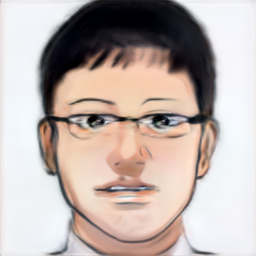

In [11]:
recon_image = G.synthesis(projected_w.unsqueeze(0), noise_mode='const')
recon_image = (recon_image + 1) * (255/2)
recon_image = recon_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
PIL.Image.fromarray(recon_image, 'RGB')